In [1]:
#Librerias básicas
import pandas as pd
import numpy as np

#Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#import plotly.graph_object as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
#%matplotlib.inline

#Librerías para procesar datos
from sklearn.model_selection import train_test_split

#Librerías de ML
import tensorflow as tf

#Suprimir Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:/Documentos/Pontia/Eleccion proyecto Jupiter/df_completo.csv")
df

,t_id,tipo,fecha_final,id_cliente_origen,balance_prev_origen,balance_post_origen,id_cliente_destino,balance_prev_destino,balance_post_destino,cuantia,mensaje_alarma,es_fraude
0,0,PAYMENT,2022-09-01 08:00:00,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,9839.64,False,False
1,1,PAYMENT,2022-09-01 08:00:00,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,1864.28,False,False
2,2,TRANSFER,2022-09-01 08:00:00,C1305486145,181.00,0.00,C553264065,0.00,0.00,181.00,False,True
3,3,CASH_OUT,2022-09-01 08:00:00,C840083671,181.00,0.00,C38997010,21182.00,0.00,181.00,False,True
4,4,PAYMENT,2022-09-01 08:00:00,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,11668.14,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362515,6362615,CASH_OUT,2022-10-02 06:00:00,C786484425,339682.13,0.00,C776919290,0.00,339682.13,339682.13,False,True
6362516,6362616,TRANSFER,2022-10-02 06:00:00,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,6311409.28,False,True
6362517,6362617,CASH_OUT,2022-10-02 06:00:00,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,6311409.28,False,True
6362518,6362618,TRANSFER,2022-10-02 06:00:00,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,850002.52,False,True


In [3]:
df.shape

(6362520, 12)

In [4]:
filtro = (df['tipo'] == 'CASH_OUT') | (df['tipo'] == 'TRANSFER')

In [5]:
df = df[filtro]

In [6]:
df.columns

Index(['t_id', 'tipo', 'fecha_final', 'id_cliente_origen',
       'balance_prev_origen', 'balance_post_origen', 'id_cliente_destino',
       'balance_prev_destino', 'balance_post_destino', 'cuantia',
       'mensaje_alarma', 'es_fraude'],
      dtype='object')

In [7]:
df['mensaje_alarma'].fillna(0, inplace=True)
df['mensaje_alarma'] = df['mensaje_alarma'].astype(bool).astype(int)

In [8]:
df['es_fraude'].fillna(0, inplace=True)
df['es_fraude'] = df['es_fraude'].astype(bool).astype(int)

In [9]:
df.head()

,t_id,tipo,fecha_final,id_cliente_origen,balance_prev_origen,balance_post_origen,id_cliente_destino,balance_prev_destino,balance_post_destino,cuantia,mensaje_alarma,es_fraude
2,2,TRANSFER,2022-09-01 08:00:00,C1305486145,181.0,0.0,C553264065,0.0,0.00,181.00,0,1
3,3,CASH_OUT,2022-09-01 08:00:00,C840083671,181.0,0.0,C38997010,21182.0,0.00,181.00,0,1
15,15,CASH_OUT,2022-09-01 08:00:00,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,229133.94,0,0
19,19,TRANSFER,2022-09-01 08:00:00,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,215310.30,0,0
24,24,TRANSFER,2022-09-01 08:00:00,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,311685.89,0,0


In [10]:
df_1 = df.copy()

#### En el EDA se determinó que la fecha no está vinculado con los fraudes por lo que se decide eliminar esas columnas además de los identificadores únicos, tanto de clientes como transacciones

In [11]:
df_1 = df_1.drop(["id_cliente_origen","id_cliente_destino","fecha_final", "t_id"], axis = 1)

### One hot encoding

In [12]:
df2 = pd.get_dummies(df_1)

In [13]:
df2.head()

,balance_prev_origen,balance_post_origen,balance_prev_destino,balance_post_destino,cuantia,mensaje_alarma,es_fraude,tipo_CASH_OUT,tipo_TRANSFER
2,181.0,0.0,0.0,0.00,181.00,0,1,0,1
3,181.0,0.0,21182.0,0.00,181.00,0,1,1,0
15,15325.0,0.0,5083.0,51513.44,229133.94,0,0,1,0
19,705.0,0.0,22425.0,0.00,215310.30,0,0,0,1
24,10835.0,0.0,6267.0,2719172.89,311685.89,0,0,0,1


In [14]:
df2.columns

Index(['balance_prev_origen', 'balance_post_origen', 'balance_prev_destino',
       'balance_post_destino', 'cuantia', 'mensaje_alarma', 'es_fraude',
       'tipo_CASH_OUT', 'tipo_TRANSFER'],
      dtype='object')

In [15]:
df2.shape

(2770360, 9)

In [16]:
X = df2.drop("es_fraude", 1)

In [17]:
y = df2["es_fraude"]

## Feature Selection

Selección de características basada en impurezas/importancia de características

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier(random_state= 42)
model.fit(X,y)

DecisionTreeClassifier(random_state=42)

<AxesSubplot:>

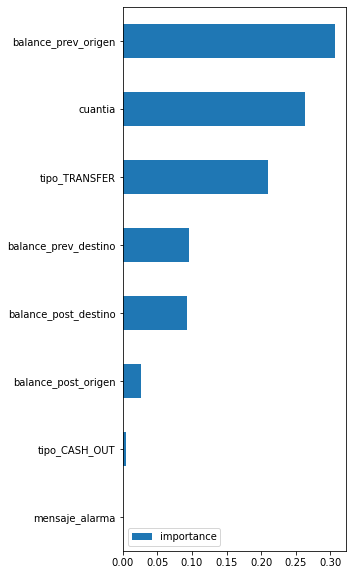

In [20]:
importances = model.feature_importances_
# visualizacion
cols = X. columns
(pd.DataFrame (importances, cols, columns = ['importance'])
  .sort_values (by= 'importance', ascending=True)
  .plot(kind= 'barh', figsize=(4,10)))

## Data Splitting


In [21]:
# ELiminamos La variables que no se usaran para el modelo

df3 =df2.drop(['balance_post_origen', 'mensaje_alarma' ], axis=1)
X1 = df3.drop('es_fraude', 1)

In [22]:
X1.shape

(2770360, 6)

In [23]:
y1 = df['es_fraude']
y1.shape

(2770360,)

## Lidiando con el desequilibrio
El conjunto de datos está desequilibrado, necesitamos equilibrarlo para obtener un mejor modelo. Un primer enfoque para tratar con datos desequilibrados es
equilibrarlos descartando la clase mayoritaria antes de aplicar un algoritmo de ML.Otro enfoque podría ser sobremuestrear la clase minoritaria, por ejemplo,
mediante la técnica de sobremuestreo SMOTE contenida en la biblioteca 'imblearn'. La tecnica de submuestreo aleatorio (RandomUnderSampler) elimina
aleatoriamente muestras de la clase mayoritaria, con o sin reemplazo, como desventaja puede aumentar la varianza del clasificador y puede descartar
potencialmente muestras utiles o importantes. Por otro lado, la ventaja que ofrece es que al reducir el tamaño del conjunto de datos, el tiempo de
computacion y el uso de memoria tambien disminuyen al trabajar con la nueva muestra. La tecnica de sobremuestreo añade muestras a la clase minoritaria
con el fin de equilibrar la diferencia entre clases. La tecnica SMOTE (Synthetic Minority Over-sampling Technique) crea puntos sinteticos (muestras) de la
clase minoritaria para alcanzar un equilibrio equitativo entre la clase minoritaria y la mayoritaria. Para este proyecto academico en particular, dado el tamaño
del dataset(6 millones de registros) optamos por utilizar la tecnica RandomUnderSampler con el objetivo de disminuir el tiempo y el uso de memoria al
ejecutar los algoritmos de ML.



In [24]:
y1.value_counts()

0    2762151
1       8209
Name: es_fraude, dtype: int64

In [25]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X1, y1)

print(pd.Series(y_under).value_counts())

0    8209
1    8209
Name: es_fraude, dtype: int64


In [26]:
print(X_under.shape)
print(y_under.shape)

(16418, 6)
(16418,)


<AxesSubplot:title={'center':'Distribucién de etiquetas después del sobremuestreo'}>

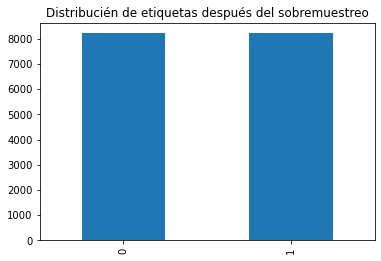

In [27]:
#Pintamos La nueva distribucién
y_under.value_counts().plot(kind='bar', title='Distribucién de etiquetas después del sobremuestreo')

## Division de conjuntos de datos en train y test

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X_under,y_under, test_size=0.3 , random_state=42)


In [29]:
print("Ejemplos usados para entrenar: ", len(X_train))
print("Ejemplos usados para test: ", len(X_test))

Ejemplos usados para entrenar:  11492
Ejemplos usados para test:  4926


## Data Scalling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler. fit_transform(X_test)

## Model Building

Se aplicarán:

1) Un algoritmo de clasificacion de Árbol de Decisión o Decision Tree Clasifier

2) Un algoritmo de SVM (Máquinas de vectores de soporte)

3) Un algoritmo de Deep Learnig


Al final del documento se uniran las metricas de la tres propuestas para evaluar los resultados y obtener conclusiones.


Para este caso en particular las «falsas alarmas» (falsos positivos) no nos preocupan, y lo que queremos evitar son los falsos negativos, por lo tanto, nos
interesa una mayor sensibilidad o recall. (VP + FN VP), Tambien nos interesa la tasa de falsos negativos, llamada también tasa de error, es la probabilidad de
que la prueba pase por alto un verdadero positive. Se calcula como FN / FN + VP, donde FN es el ntimero de falsos negativos y VP es el numero de
verdaderos positivos.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [32]:
#Árbol de decisión

# Definir el modelo de clasificación
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state= 42)

#Entrenarlo
clf.fit(X_train, y_train)

# Obtener Las predicciones para el conjunto de datos de testeo
y_pred = clf.predict(X_test)

In [33]:
# Obtener Las metricas
MSE_test = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)

# Inprimimos Las metricas
print('MSE : ' + str(MSE_test))
print('Accuracy: ' + str(accuracy))
print('recall: ' + str(recall))
print('precision: ' + str(precision))

MSE : 0.1518473406414941
Accuracy: 0.8481526593585059
recall: 0.8122199592668025
precision: 0.8741779921087243


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
matrix = confusion_matrix(y_test, y_test)
print(matrix)

[[2471    0]
 [   0 2455]]


Confusion matrix
[[2184  287]
 [ 461 1994]]
Normalized confusion matrix
[[0.88385269 0.11614731]
 [0.18778004 0.81221996]]


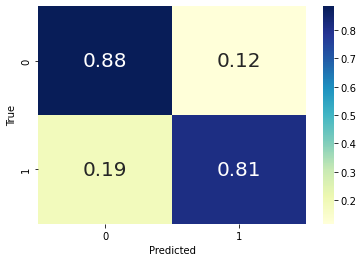

In [36]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}, fmt=".2f") \
       .set(ylabel='True', xlabel='Predicted')

- 88% de los casos, predijo que no era fraude y era cierto, (Verdaderos Negativos)
- 18% de los casos predijo que no era fraude y era. (Falsos Negativos)
- 12% de los casos predijo que era fraude y no era (Falsos positivos)
- 82% de los casos que son fraude fueron predichos como fraude. (Verdaderos Positivos)

In [37]:
from sklearn.metrics import RocCurveDisplay

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva de Roc')
    plt.legend()
    plt.show()

AUC:  0.8480363252424664


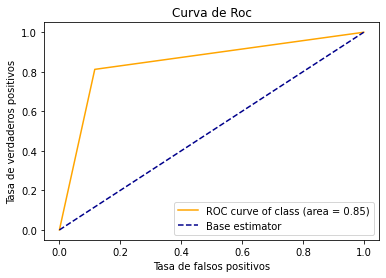

In [38]:
from sklearn.metrics import roc_curve, auc

# Distancia de las muestras al hiperplano separador
probs = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

print('AUC: ', roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

La curva ROC compara la Tasa de Verdaderos Positivos y la Tasa de Falsos Positivos, esta se usa para medi el rendimiento (0 la efectividad, en su mas
amplio sentido) del clasificador a traves de distintos metodos, en este caso se emplea el AUC - ROC (area bajo la curva ROC). El ROC es una curva de
probabilidad y el AUC representa el grado de separabilidad, este indica en que medida el modelo es capaz de distinguir entre clases. Respecto a la
‘generacion de la curva, cuanto mas alto sea el AUC mejor sera el modelo a la hora de predecir no fraudes (0s) como no fraudes (0s) y fraudes (1s) como
fraudes (1s). Cuanto mas abraza la curva la esquina superior izquierda del grafico, mejor lo hace el modelo para clasificar los datos en categorias. Cuanto
mas cerca esté el AUC de 1, mejor sera el modelo. Un modelo con un AUC igual a 0.5 no es mejor que un modelo que hace clasificaciones aleatorias. En
nuestro caso la AUC es del 86% por lo que podemos decir que performa de buena manera al distinguir entre las clases.


## Obtengamos tos mejores hiperparametros
Para obtener la puntuacion de la validacion cruzada, se realiza un proceso para encontrar y mejorar (tunning) los parametros del algoritmo de regresion
logistica

Se importa el metodo GridSearchCV, el cual realiza una busqueda exhaustiva sobre los valores de los parametros especificados para el estimador.Tras ello,se hace el ajuste mediante el metodo 'fit'. Los parametros del estimador utiizados para aplicar este metodo se optimizan mediante una busqueda cruzada en una cuadricula (grid) de parametros.

In [39]:
from sklearn.model_selection import GridSearchCV

# Crear objeto DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

# Definir cuadrícula de parámetros
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2'],
              'criterion': ['gini', 'entropy','log_loss'],
              'ccp_alpha': [0, 0.01]}

# Definir objeto GridSearchCV
grid_search = GridSearchCV(tree_clf, param_grid=param_grid, cv=5)

#Entrenamiento
grid_search.fit(X_train, y_train)


print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))


Best: 0.951707 using {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [40]:
# Acceder al mejor estimador encontrado por GridSearchCV
best_estimator = grid_search.best_estimator_

# Hacer predicciones en nuevos datos
y_pred2 = best_estimator.predict(X_test)

In [41]:
# Obtener Las metricas
MSE_test = mean_squared_error(y_test, y_pred2)
accuracy = accuracy_score(y_test,y_pred2)
recall = recall_score(y_test, y_pred2)
precision= precision_score(y_test, y_pred2)

# Inprimimos Las metricas
print('MSE : ' + str(MSE_test))
print('Accuracy: ' + str(accuracy))
print('recall: ' + str(recall))
print('precision: ' + str(precision))

MSE : 0.1664636622005684
Accuracy: 0.8335363377994316
recall: 0.9221995926680244
precision: 0.782578638091946


Confusion matrix
[[1842  629]
 [ 191 2264]]
Normalized confusion matrix
[[0.74544719 0.25455281]
 [0.07780041 0.92219959]]


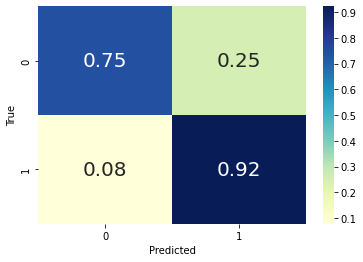

In [42]:
CM = confusion_matrix(y_test, y_pred2)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}, fmt=".2f") \
       .set(ylabel='True', xlabel='Predicted')

- 84% de los casos, predijo que no era fraude y era cierto, (Verdaderos Negativos)
- 15% de los casos predijo que no era fraude y era. (Falsos Negativos)
- 16% de los casos predijo que era fraude y no era (Falsos positivos)
- 85% de los casos que son fraude fueron predichos como fraude. (Verdaderos Positivos)

#### Podemos observar que no hay una diferencia muy dispar pero cabe destacar que en esta ocasión el porcentaje de verdaderos positivos aumentó respecto a la anterior predicción de un 82% hasta el 85%

## SVM

In [43]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE

In [44]:
X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, n_redundant=0, random_state=42)


model2 = SVC(kernel='linear', C=1)
# Seleccionar características utilizando RFE
rfe = RFE(estimator=model2, n_features_to_select=5, step=1)
rfe.fit(X, y)

RFE(estimator=SVC(C=1, kernel='linear'), n_features_to_select=5)

In [45]:
# Normalización
scaler = make_pipeline(StandardScaler())
X = scaler.fit_transform(X)

In [46]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
print("Ejemplos usados para entrenar: ", len(X_train))
print("Ejemplos usados para test: ", len(X_test))

Ejemplos usados para entrenar:  3500
Ejemplos usados para test:  1500


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler. fit_transform(X_test)

In [49]:
#SVM

# Definir el modelo de clasificación
svm = SVC(kernel='linear', C=1, random_state=42, probability=True)

#Entrenarlo
svm.fit(X_train, y_train)

# Obtener Las predicciones para el conjunto de datos de testeo
y_pred = svm.predict(X_test)

In [50]:
# Obtener Las metricas
MSE_test = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)

# Inprimimos Las metricas
print('MSE : ' + str(MSE_test))
print('Accuracy: ' + str(accuracy))
print('recall: ' + str(recall))
print('precision: ' + str(precision))

MSE : 0.166
Accuracy: 0.834
recall: 0.8249336870026526
precision: 0.8416779431664412


In [51]:
matrix = confusion_matrix(y_test, y_test)
print(matrix)

[[746   0]
 [  0 754]]


Confusion matrix
[[629 117]
 [132 622]]
Normalized confusion matrix
[[0.84316354 0.15683646]
 [0.17506631 0.82493369]]


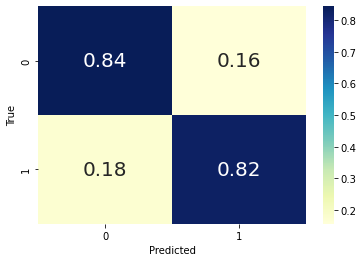

In [52]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}, fmt=".2f") \
       .set(ylabel='True', xlabel='Predicted')

- 84% de los casos, predijo que no era fraude y era cierto, (Verdaderos Negativos)
- 18% de los casos predijo que no era fraude y era. (Falsos Negativos)
- 16% de los casos predijo que era fraude y no era (Falsos positivos)
- 82% de los casos que son fraude fueron predichos como fraude. (Verdaderos Positivos)

In [53]:
from sklearn.metrics import RocCurveDisplay

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva de Roc')
    plt.legend()
    plt.show()

AUC:  0.9083280591092369


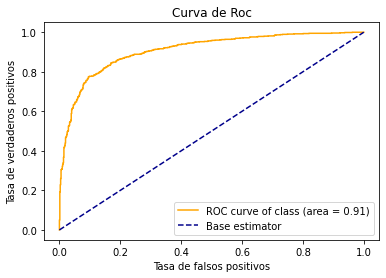

In [54]:
# Distancia de las muestras al hiperplano separador
y_pred_proba = svm.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba )
roc_auc = auc(fpr, tpr)

print('AUC: ', roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

In [55]:
# Define the hyperparameters to search
parameters_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

In [56]:
# Perform grid search with cross-validation
grid_search2 = GridSearchCV(svm, parameters_grid, cv=5)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SVC(C=1, kernel='linear', probability=True,
                           random_state=42),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [57]:
print("Best: %f using %s" % (grid_search2.best_score_, grid_search2.best_params_))

Best: 0.940857 using {'C': 1, 'kernel': 'rbf'}


In [58]:
# Acceder al mejor estimador encontrado por GridSearchCV
best_estimator = grid_search2.best_estimator_

# Hacer predicciones en nuevos datos
y_pred3 = best_estimator.predict(X_test)

In [59]:
# Obtener Las metricas
MSE_test = mean_squared_error(y_test, y_pred3)
accuracy = accuracy_score(y_test,y_pred3)
recall = recall_score(y_test, y_pred3)
precision= precision_score(y_test, y_pred3)

# Inprimimos Las metricas
print('MSE : ' + str(MSE_test))
print('Accuracy: ' + str(accuracy))
print('recall: ' + str(recall))
print('precision: ' + str(precision))

MSE : 0.06066666666666667
Accuracy: 0.9393333333333334
recall: 0.9442970822281167
precision: 0.9356110381077529


Confusion matrix
[[697  49]
 [ 42 712]]
Normalized confusion matrix
[[0.93431635 0.06568365]
 [0.05570292 0.94429708]]


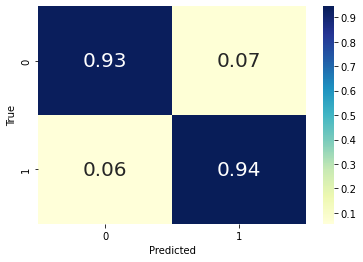

In [60]:
CM = confusion_matrix(y_test, y_pred3)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}, fmt=".2f") \
       .set(ylabel='True', xlabel='Predicted')

- 93% de los casos, predijo que no era fraude y era cierto, (Verdaderos Negativos)
- 6% de los casos predijo que no era fraude y era. (Falsos Negativos)
- 7% de los casos predijo que era fraude y no era (Falsos positivos)
- 94% de los casos que son fraude fueron predichos como fraude. (Verdaderos Positivos)

Podemos observar que no hay una diferencia muy dispar pero cabe destacar que en esta ocasión el porcentaje de verdaderos positivos aumentó respecto a la anterior predicción de un 82% hasta el 94% es decir mejora en un 12%

# Redes neuronales

In [61]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Crear el modelo de red neuronal
# Este modelo se refiere a que crearemos una serie de capas de neuronas secuenciales, “una delante de otra”
model = tf.keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
#model.add(layers.Dropout(0.5))

Antes de de entrenar la red haremos unos ajustes a nuestro modelo:
En este caso, utilizaremos la pérdida logaritmica, que para un problema de clasificacidn binaria se define en Keras como
“binary_crossentropy”. También utilizaremos el optimizador “adam” que es la forma de reajustar sus pesos.

In [62]:
# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['mse', 'accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.FalseNegatives()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________


In [63]:
#Early Stopping
#callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode='min', verbose=1 )

In [64]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 50 , epochs = 25,validation_split=0.3, verbose=1) #callbacks=[callback],validation_split=0.3, verbose=1)

Epoch 1/25
70/70 [==============================] - 1s 7ms/step - loss: 0.6147 - mse: 0.2132 - accuracy: 0.6594 - recall: 0.6111 - false_negatives: 679.0000 - val_loss: 0.4360 - val_mse: 0.1348 - val_accuracy: 0.8413 - val_recall: 0.8316 - val_false_negatives: 127.0000
Epoch 2/25
70/70 [==============================] - 0s 2ms/step - loss: 0.4347 - mse: 0.1378 - accuracy: 0.8171 - recall: 0.8110 - false_negatives: 330.0000 - val_loss: 0.3241 - val_mse: 0.0981 - val_accuracy: 0.8720 - val_recall: 0.8594 - val_false_negatives: 106.0000
Epoch 3/25
70/70 [==============================] - 0s 2ms/step - loss: 0.3523 - mse: 0.1072 - accuracy: 0.8560 - recall: 0.8477 - false_negatives: 266.0000 - val_loss: 0.2747 - val_mse: 0.0829 - val_accuracy: 0.8893 - val_recall: 0.8793 - val_false_negatives: 91.0000
Epoch 4/25
70/70 [==============================] - 0s 2ms/step - loss: 0.3150 - mse: 0.0966 - accuracy: 0.8657 - recall: 0.8528 - false_negatives: 257.0000 - val_loss: 0.2438 - val_mse: 0.07

In [65]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
loss, mse, accuracy, recall, falseNegatives = model.evaluate(X_test, y_test)

print('MSE:', mse)
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Falsos negativos:', falseNegatives)

47/47 [==============================] - 0s 1ms/step - loss: 0.1290 - mse: 0.0348 - accuracy: 0.9513 - recall: 0.9602 - false_negatives: 30.0000
MSE: 0.03482240065932274
Accuracy: 0.9513333439826965
Recall: 0.960212230682373
Falsos negativos: 30.0


In [66]:
# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

47/47 [==============================] - 0s 1ms/step


## Guardamos los modelos de ML Y DL 

In [633]:
model.save("D:/Documentos/Pontia/Eleccion proyecto Jupiter/.h5")

In [634]:
import joblib

In [635]:
joblib.dump(grid_search2, 'modelo_SVC.pkl')

['modelo_SVC.pkl']

In [636]:
joblib.dump(grid_search, 'modelo_Decision_Tree.pkl')

['modelo_Decision_Tree.pkl']

## Elección del modelo

Para continuar con los casos no etiquetados debemos escoger un modelo. Debido a la comparación de los resultados se determina que el modelo con una mayor **Recall** es el de **redes neuronales** con un resultado del **97,2%** respecto al SVM que obtubo el 94,4% y el de árbol de decisión con un porcentaje del 88,6%

## Aplicamos los modelos de detección de fraude a los datos en producción no etiquetados y generamos un archivo con las predicciones de cada uno de los modelos.
Este archivo debe poseer la siguiente información: identificador de la transferencia y resultado de la predicción (si es fraudulenta o no).

## Cargamos el dataset con los fraudes a predecir

In [644]:
prediccion = pd.read_csv("D:/Documentos/Pontia/Eleccion proyecto Jupiter/fraudes_a_predecir.csv") 

In [645]:
prediccion.head()

,t_id,tipo,fecha_final,id_cliente_origen,balance_prev_origen,balance_post_origen,id_cliente_destino,balance_prev_destino,balance_post_destino,cuantia,mensaje_alarma,es_fraude
0,1200,TRANSFER,2022-09-01 08:00:00,C1366722422,0.00,0.00,C2083562754,763134.49,1186556.81,424141.36,NaN,NaN
1,156083,CASH_OUT,2022-09-01 19:00:00,C554058441,438.00,0.00,C1620029891,7992405.59,8198842.17,206436.59,NaN,NaN
2,160160,PAYMENT,2022-09-01 19:00:00,C1829190420,0.00,0.00,M1542648727,0.00,0.00,12185.20,NaN,NaN
3,217179,CASH_IN,2022-09-01 20:00:00,C649079159,14441449.12,14624800.35,C580961280,542893.81,467905.16,183351.24,NaN,NaN
4,295005,PAYMENT,2022-09-01 22:00:00,C1329690227,286176.45,284264.40,M81794933,0.00,0.00,1912.05,NaN,NaN


In [646]:
categoria = (prediccion['tipo'] == 'TRANSFER') | (prediccion['tipo']  == 'CASH_OUT')

In [647]:
df_fraudes_a_predecir =  prediccion[categoria]

In [648]:
df_fraudes_a_predecir.count()

t_id                    49
tipo                    49
fecha_final             49
id_cliente_origen       49
balance_prev_origen     49
balance_post_origen     49
id_cliente_destino      49
balance_prev_destino    49
balance_post_destino    49
cuantia                 49
mensaje_alarma           0
es_fraude                0
dtype: int64

In [649]:
df_fraudes_a_predecir.head()

,t_id,tipo,fecha_final,id_cliente_origen,balance_prev_origen,balance_post_origen,id_cliente_destino,balance_prev_destino,balance_post_destino,cuantia,mensaje_alarma,es_fraude
0,1200,TRANSFER,2022-09-01 08:00:00,C1366722422,0.0,0.0,C2083562754,763134.49,1186556.81,424141.36,NaN,NaN
1,156083,CASH_OUT,2022-09-01 19:00:00,C554058441,438.0,0.0,C1620029891,7992405.59,8198842.17,206436.59,NaN,NaN
5,318471,TRANSFER,2022-09-01 23:00:00,C219066447,0.0,0.0,C281619645,1390795.22,2796844.45,1205911.79,NaN,NaN
6,330446,CASH_OUT,2022-09-01 23:00:00,C43959486,0.0,0.0,C350888235,2849059.35,2889608.83,40549.48,NaN,NaN
7,399390,CASH_OUT,2022-09-02 01:00:00,C2082195940,0.0,0.0,C261108139,384981.76,681336.38,296354.62,NaN,NaN


In [650]:
ID = df_fraudes_a_predecir['t_id']

In [651]:
df_fraudes_a_predecir['dif_origen'] = abs(df_fraudes_a_predecir['balance_post_origen']-df_fraudes_a_predecir['balance_prev_origen'].astype(int))
df_fraudes_a_predecir['dif_destino'] = abs(df_fraudes_a_predecir['balance_post_destino']-df_fraudes_a_predecir['balance_prev_destino'].astype(int))

In [652]:
df_fraudes_a_predecir.head()

,t_id,tipo,fecha_final,id_cliente_origen,balance_prev_origen,balance_post_origen,id_cliente_destino,balance_prev_destino,balance_post_destino,cuantia,mensaje_alarma,es_fraude,dif_origen,dif_destino
0,1200,TRANSFER,2022-09-01 08:00:00,C1366722422,0.0,0.0,C2083562754,763134.49,1186556.81,424141.36,NaN,NaN,0.0,423422.81
1,156083,CASH_OUT,2022-09-01 19:00:00,C554058441,438.0,0.0,C1620029891,7992405.59,8198842.17,206436.59,NaN,NaN,438.0,206437.17
5,318471,TRANSFER,2022-09-01 23:00:00,C219066447,0.0,0.0,C281619645,1390795.22,2796844.45,1205911.79,NaN,NaN,0.0,1406049.45
6,330446,CASH_OUT,2022-09-01 23:00:00,C43959486,0.0,0.0,C350888235,2849059.35,2889608.83,40549.48,NaN,NaN,0.0,40549.83
7,399390,CASH_OUT,2022-09-02 01:00:00,C2082195940,0.0,0.0,C261108139,384981.76,681336.38,296354.62,NaN,NaN,0.0,296355.38


In [653]:
df_fraudes_a_predecir1 = df_fraudes_a_predecir.drop(['fecha_final','id_cliente_origen','id_cliente_destino','mensaje_alarma','es_fraude'], axis=1)#,'balance_post_origen', 'balance_prev_destino','mensaje_alarma','es_fraude'], axis=1)

In [654]:
df_fraudes_a_predecir1

,t_id,tipo,balance_prev_origen,balance_post_origen,balance_prev_destino,balance_post_destino,cuantia,dif_origen,dif_destino
0,1200,TRANSFER,0.00,0.00,763134.49,1186556.81,424141.36,0.00,423422.81
1,156083,CASH_OUT,438.00,0.00,7992405.59,8198842.17,206436.59,438.00,206437.17
5,318471,TRANSFER,0.00,0.00,1390795.22,2796844.45,1205911.79,0.00,1406049.45
6,330446,CASH_OUT,0.00,0.00,2849059.35,2889608.83,40549.48,0.00,40549.83
7,399390,CASH_OUT,0.00,0.00,384981.76,681336.38,296354.62,0.00,296355.38
10,472486,CASH_OUT,247241.00,114875.35,0.00,79219.89,132365.65,132365.65,79219.89
11,533676,CASH_OUT,25335.00,0.00,198715.11,402893.70,204178.60,25335.00,204178.70
12,543910,CASH_OUT,0.00,0.00,751819.07,1276490.95,206758.15,0.00,524671.95
13,601322,TRANSFER,0.00,0.00,922768.26,1610897.33,688129.07,0.00,688129.33
15,876335,CASH_OUT,7470.00,0.00,7335389.47,7339487.76,189329.52,7470.00,4098.76


In [655]:
# Convertir la columna "tipo" en columnas binarias
df_tipos = pd.get_dummies(df_fraudes_a_predecir1["tipo"])

# Agregar las nuevas columnas "tipo cash out" y "tipo transfer"
prediccion["tipo cash out"] = df_tipos["CASH_OUT"]
prediccion["tipo transfer"] = df_tipos["TRANSFER"]

# Convertir los valores en las nuevas columnas en enteros (0 o 1)
prediccion["tipo cash out"] = prediccion["tipo cash out"].fillna(0).astype(int)
prediccion["tipo transfer"] = prediccion["tipo transfer"].fillna(0).astype(int)

In [656]:
df_tipos['t_id'] = df_fraudes_a_predecir1['t_id']

In [657]:
df_tipos.head()

,CASH_OUT,TRANSFER,t_id
0,0,1,1200
1,1,0,156083
5,0,1,318471
6,1,0,330446
7,1,0,399390


In [658]:
df_fraudes_a_predecir2 = pd.merge(df_fraudes_a_predecir1, df_tipos, on= 't_id', how='left')

In [659]:
df_fraudes_a_predecir2.head()

,t_id,tipo,balance_prev_origen,balance_post_origen,balance_prev_destino,balance_post_destino,cuantia,dif_origen,dif_destino,CASH_OUT,TRANSFER
0,1200,TRANSFER,0.0,0.0,763134.49,1186556.81,424141.36,0.0,423422.81,0,1
1,156083,CASH_OUT,438.0,0.0,7992405.59,8198842.17,206436.59,438.0,206437.17,1,0
2,318471,TRANSFER,0.0,0.0,1390795.22,2796844.45,1205911.79,0.0,1406049.45,0,1
3,330446,CASH_OUT,0.0,0.0,2849059.35,2889608.83,40549.48,0.0,40549.83,1,0
4,399390,CASH_OUT,0.0,0.0,384981.76,681336.38,296354.62,0.0,296355.38,1,0


In [660]:
# Eliminar columnas innecesarias
df_fraudes_a_predecir2.drop(['t_id', 'tipo',], axis=1, inplace=True)

In [661]:
df_fraudes_a_predecir2.columns

Index(['balance_prev_origen', 'balance_post_origen', 'balance_prev_destino',
       'balance_post_destino', 'cuantia', 'dif_origen', 'dif_destino',
       'CASH_OUT', 'TRANSFER'],
      dtype='object')

In [662]:
df_fraudes_a_predecir2.head()

,balance_prev_origen,balance_post_origen,balance_prev_destino,balance_post_destino,cuantia,dif_origen,dif_destino,CASH_OUT,TRANSFER
0,0.0,0.0,763134.49,1186556.81,424141.36,0.0,423422.81,0,1
1,438.0,0.0,7992405.59,8198842.17,206436.59,438.0,206437.17,1,0
2,0.0,0.0,1390795.22,2796844.45,1205911.79,0.0,1406049.45,0,1
3,0.0,0.0,2849059.35,2889608.83,40549.48,0.0,40549.83,1,0
4,0.0,0.0,384981.76,681336.38,296354.62,0.0,296355.38,1,0


In [663]:
from sklearn.preprocessing import StandardScaler

# Obtener solo las columnas numéricas
columnas_numericas = ['balance_prev_origen', 'balance_post_destino', 'cuantia', 'dif_origen', 'dif_destino']
data_numeros = df_fraudes_a_predecir2[columnas_numericas]

# Estandarizar las columnas numéricas
scaler = StandardScaler()
data_numeros = scaler.fit_transform(data_numeros)

# Reemplazar las columnas originales con las columnas estandarizadas
df_fraudes_a_predecir2[columnas_numericas] = data_numeros

In [664]:
df_fraudes_a_predecir2.head()

,balance_prev_origen,balance_post_origen,balance_prev_destino,balance_post_destino,cuantia,dif_origen,dif_destino,CASH_OUT,TRANSFER
0,-0.413012,0.0,763134.49,-0.103291,0.322376,-0.336253,0.448365,0,1
1,-0.411646,0.0,7992405.59,4.103030,-0.223981,-0.334842,-0.147672,1,0
2,-0.413012,0.0,1390795.22,0.862640,2.284324,-0.336253,3.147536,0,1
3,-0.413012,0.0,2849059.35,0.918285,-0.640295,-0.336253,-0.603347,1,0
4,-0.413012,0.0,384981.76,-0.406348,0.001680,-0.336253,0.099324,1,0


## Red Neuronal prediccion

In [665]:
from keras.models import load_model
import numpy as np

# Cargar el modelo previamente entrenado
modelo = load_model("D:/Documentos/Pontia/Eleccion proyecto Jupiter/.h5")

In [666]:
# Crear un arreglo de ceros con la forma correcta para agregar las características adicionales
columnas_nuevas = np.zeros((len(df_fraudes_a_predecir2), 11))

In [667]:
# Concatenar los datos originales y los nuevos para formar una matriz de entrada completa
X = np.concatenate([df_fraudes_a_predecir2.values, columnas_nuevas], axis=1)

In [668]:
# Realizar la predicción con el modelo
predicciones_fraude = modelo.predict(X)

2/2 [==============================] - 0s 3ms/step


In [669]:
df_red_neuronal = pd.DataFrame(data=ID.values, columns=['t_id'])

In [670]:
df_red_neuronal.head()

,t_id
0,1200
1,156083
2,318471
3,330446
4,399390


In [671]:
df_red_neuronal['es_fraude'] = predicciones_fraude

In [672]:
df_red_neuronal

,t_id,es_fraude
0,1200,1.000000
1,156083,1.000000
2,318471,1.000000
3,330446,1.000000
4,399390,1.000000
5,472486,0.000000
6,533676,1.000000
7,543910,1.000000
8,601322,1.000000
9,876335,1.000000


In [673]:
# Definir una función para clasificar los valores como 0 o 1
def clasificar(valor):
    if valor > 0.5:
        return 1
    else:
        return 0
# Aplicar la función a la columna 'porcentaje' para crear una nueva columna 'clasificacion'
df_red_neuronal['es_fraude'] = df_red_neuronal['es_fraude'].apply(clasificar)

# Mostrar el DataFrame resultante
df_red_neuronal

,t_id,es_fraude
0,1200,1
1,156083,1
2,318471,1
3,330446,1
4,399390,1
5,472486,0
6,533676,1
7,543910,1
8,601322,1
9,876335,1


In [674]:
df_red_neuronal.shape

(49, 2)

In [675]:
#df_red_neuronal.to_csv('predicciones_red_neuronal.csv', index = False)

## SVM prediccion

In [676]:
import joblib

SVC = joblib.load("D:/Documentos/Pontia/Eleccion proyecto Jupiter/modelo_SVC.pkl")

In [677]:
# Crear un arreglo de ceros con la forma correcta para agregar las características adicionales
columnas_nuevas = np.zeros((len(df_fraudes_a_predecir2), 11))

In [678]:
X = np.concatenate([df_fraudes_a_predecir2.values, columnas_nuevas], axis=1)

In [679]:
# Realizar la predicción con el modelo
prediccion_SVC = SVC.predict(X)

In [680]:
df_svc = pd.DataFrame(data=ID.values, columns=['t_id'])

In [681]:
df_svc.head()

,t_id
0,1200
1,156083
2,318471
3,330446
4,399390


In [682]:
df_svc['es_fraude'] = prediccion_SVC

In [683]:
df_svc

,t_id,es_fraude
0,1200,1
1,156083,1
2,318471,1
3,330446,1
4,399390,1
5,472486,1
6,533676,1
7,543910,1
8,601322,1
9,876335,1


In [684]:
#df_svc.to_csv('predicciones_svc.csv', index = False)